# 机器学习练习 - 回归

代码更新地址：https://github.com/fengdu78/WZU-machine-learning-course

代码修改并注释：黄海广，haiguang2000@wzu.edu.cn

## 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'data/regress_data1.csv'
data = pd.read_csv(path)

def computeCost(X, y, w):
    # 计算代价函数
    m = X.shape[0]  # 样本数量
    n = X.shape[1]  # 特征数量
    
    inner = np.power((X @ w.T) - y, 2)  # (m, n) @ (n, 1) -> (m, 1)
    
    # 返回平均代价
    return np.sum(inner) / (2 * m)


data.insert(0, 'Ones', 1)


cols = data.shape[1]  # 获取data的列数
X = data.iloc[:,:cols-1]  # 获取除最后一列外的所有列作为特征矩阵X
y = data.iloc[:,cols-1:]  # 获取最后一列作为目标变量y



# X = np.array(X.values)
# y = np.array(y.values)
# # w = np.array([0, 0])
# w = np.zeros((1,2))  # 将矩阵w初始化为(2, 1)的零矩阵
X = np.array(X.values).reshape(-1,X.shape[1])
y = np.array(y.values).reshape(-1,1)
w = np.zeros((1,2))


computeCost(X, y, w)

32.072733877455676

In [17]:
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

In [2]:
def gradient_Abscent (X,y,theta,alpha,count):
    costs = []
    for i in range(count):
        theta = theta - (X.T @(X @ theta - y)) * alpha / len(X)
        cost = computeCost(X,y,theta)
        costs.append(cost)
        if i%100 == 0:
            print(cost)
    return theta,costs
 
alpha = 0.01
count = 2000
theta1,costs =gradient_Abscent(X,y,w,alpha,count) 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [20]:
def batch_gradientDescent(X, y, w, alpha, iters):
    temp = np.zeros(w.shape)
    parameters = w.shape[1]
    cost = np.zeros(iters)
    m=len(X)
    for i in range(iters):
        error = np.dot(X, w.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = w[0, j] - ((alpha / m) * np.sum(term))
        w = temp.copy()
        cost[i] = computeCost(X, y, w)
    return w, cost


alpha = 0.01
iters = 1000



g, cost = batch_gradientDescent(X, y, w, alpha, iters)#返回更新后的参数向量g和损失值数组cost。
g

C:\Users\hai_g\AppData\Local\Temp\ipykernel_38336\3366367200.py:13: RuntimeWarning: overflow encountered in power
  inner = np.power((X @ w.T) - y, 2)  # (m, n) @ (n, 1) -> (m, 1)
C:\Users\hai_g\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hai_g\AppData\Local\Temp\ipykernel_38336\3366367200.py:13: RuntimeWarning: invalid value encountered in matmul
  inner = np.power((X @ w.T) - y, 2)  # (m, n) @ (n, 1) -> (m, 1)
C:\Users\hai_g\AppData\Local\Temp\ipykernel_38336\2943617689.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  temp[0, j] = w[0, j] - ((alpha / m) * np.sum(term))


array([[nan, nan]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [19]:
computeCost(X, y, g)

3.274945886356039e+37

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

C:\Users\hai_g\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hai_g\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hai_g\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hai_g\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hai_g\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  fig.canvas.print_figure(bytes_

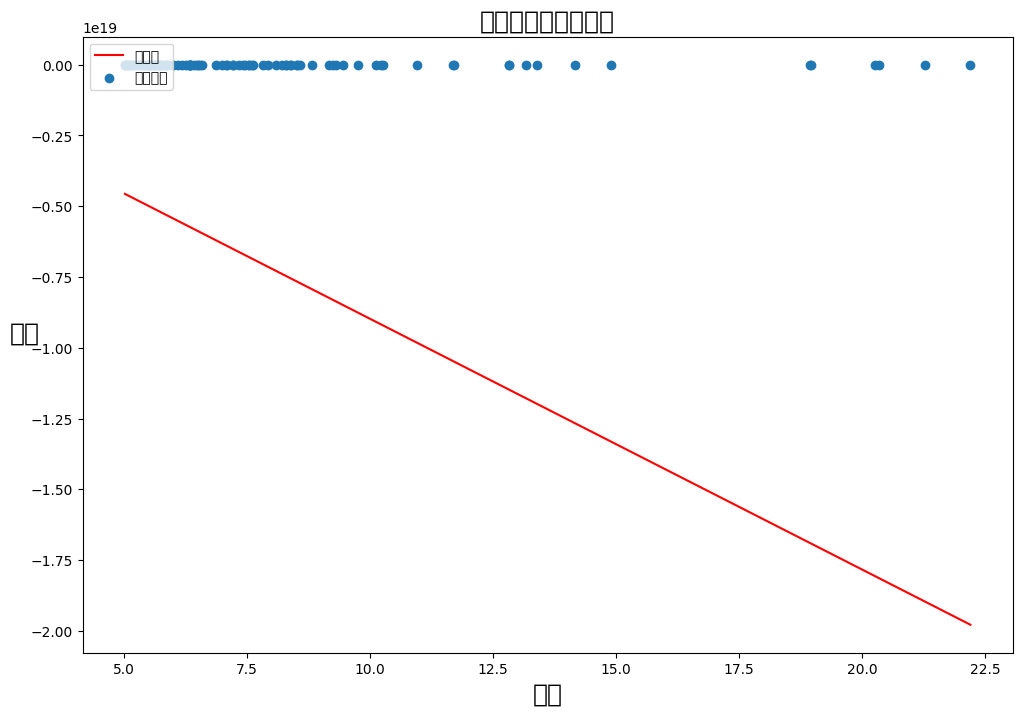

In [13]:
# 生成预测值
x = np.linspace(data['人口'].min(), data['人口'].max(), 100)
# 根据参数估计值生成预测值
f = g[0, 0] + (g[0, 1] * x)
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制预测值曲线
ax.plot(x, f, 'r', label='预测值')
# 绘制训练数据散点图
ax.scatter(data['人口'], data['收益'], label='训练数据')
# 添加图例
ax.legend(loc=2)
# 设置x轴和y轴标签
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('预测收益和人口规模', fontsize=18)
# 显示图形
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

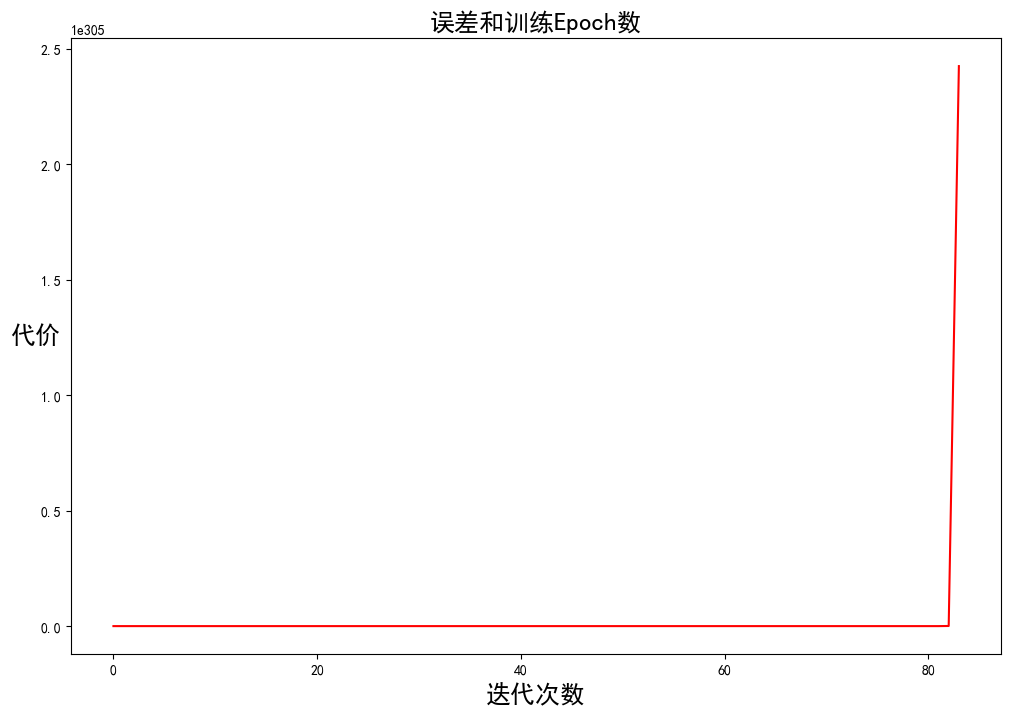

In [20]:
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制代价随迭代次数的变化曲线
ax.plot(np.arange(iters), cost, 'r')
# 设置x轴和y轴标签
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('误差和训练Epoch数', fontsize=18)
# 显示图形
plt.show()

## 多变量线性回归

练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [21]:
path = 'data/regress_data2.csv'
data2 = pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [23]:
# 添加一列全为1的列
data2.insert(0, 'Ones', 1)
# 设置X（训练数据）和y（目标变量）
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]
# 转换为数组并初始化theta
X2 = np.asarray(X2)
y2 = np.asarray(y2)
w2 = np.matrix(np.array([0,0,0]))
# 在数据集上进行线性回归
g2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)
# 获取模型的代价（误差）
computeCost(X2, y2, g2)

0.4893617021276598

我们也可以快速查看这一个的训练进程。

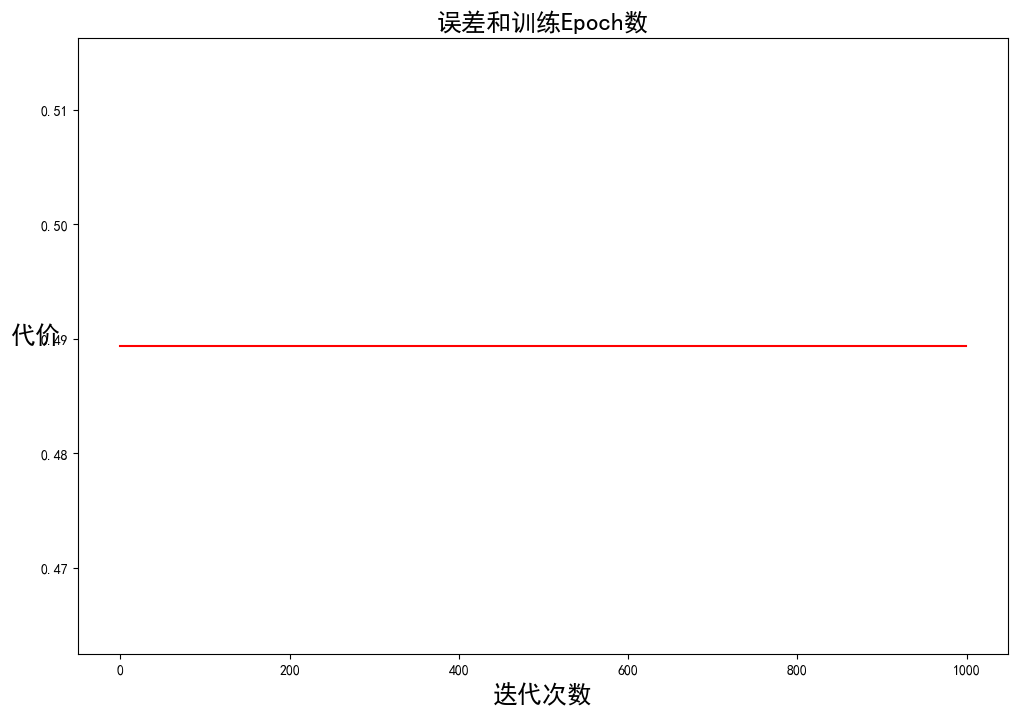

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

C:\Users\hai_g\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LinearRegression()

scikit-learn model的预测表现

In [26]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'A1'

## $L_2$正则化
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$，此时称作`Ridge Regression`：

In [27]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)

C:\Users\hai_g\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ridge()

In [ ]:
x2 = np.array(X[:, 1].A1)
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_1$正则化：
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，此时称作`Lasso Regression` 

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)

In [ ]:
x3= np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## 调参

In [ ]:
# 导入所需的库和模块
from sklearn.model_selection import cross_val_score
# 定义一组不同的alpha值
alphas = np.logspace(-3, 2, 50)
# 初始化一个空列表，用于存储测试分数
test_scores = []
# 遍历每个alpha值
for alpha in alphas:
    # 创建一个Ridge回归模型，设置alpha值
    clf = Ridge(alpha)    
    # 使用交叉验证计算负均方误差的平方根，并取平均值
    test_score = np.sqrt(-cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error'))    
    # 将平均测试分数添加到列表中
    test_scores.append(np.mean(test_score))

In [ ]:
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");
plt.show()

## 最小二乘法(LSM)：

最小二乘法的需要求解最优参数$w^{*}$：

已知：目标函数

$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {h}\left( {x^{(i)}} \right)-{y^{(i)}} \right)}^{2}}}$

其中：${h}\left( x \right)={w^{T}}X={w_{0}}{x_{0}}+{w_{1}}{x_{1}}+{w_{2}}{x_{2}}+...+{w_{n}}{x_{n}}$

将向量表达形式转为矩阵表达形式，则有$J(w )=\frac{1}{2}{{\left( Xw -y\right)}^{2}}$ ，其中$X$为$m$行$n+1$列的矩阵（$m$为样本个数，$n$为特征个数），$w$为$n+1$行1列的矩阵(包含了$w_0$)，$y$为$m$行1列的矩阵，则可以求得最优参数$w^{*} ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$ 

梯度下降与最小二乘法的比较：

梯度下降：需要选择学习率$\alpha$，需要多次迭代，当特征数量$n$大时也能较好适用，适用于各种类型的模型	

最小二乘法：不需要选择学习率$\alpha$，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量$n$较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n^3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [ ]:
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [ ]:
final_w2=LSM(X, y)#感觉和批量梯度下降的theta的值有点差距
final_w2

In [ ]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.